In [69]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt


In [70]:
RegSeasonResults = pd.read_csv("RegularSeasonCompactResults.csv")
teams = pd.read_csv("teams.csv")

In [94]:
RegSeasonResults['WLocCode'] = 1 
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
RegSeasonResults.WLoc.replace('N',0,inplace=True)
RegSeasonResults.WLoc.replace('A',-1,inplace=True)
RegSeasonResults.WLoc.replace('H',1,inplace=True)




In [98]:
RegSeasonResults['WElo'] = 0.000000000000 
RegSeasonResults['LElo'] = 0.000000000000
temp = RegSeasonResults[1:3737]


In [99]:
elo_dict = {}
k = 5

In [100]:
for i in teams.TeamID:
    elo_dict[i] = 0
i = 0
RegSeasonResults.dtypes

Season        int64
DayNum        int64
WTeamID       int64
WScore        int64
LTeamID       int64
LScore        int64
WLoc          int64
NumOT         int64
WLocCode      int64
WElo        float64
LElo        float64
dtype: object

In [101]:
for j in temp.iterrows():
    ###########################################################################################
    #######New logic####### 
    
    winner_rating = pow(10,(elo_dict[j[1].WTeamID])/400)
    loser_rating = pow(10,(elo_dict[j[1].LTeamID])/400)
    
    expected_winner = winner_rating/(winner_rating+loser_rating) 
    expected_loser = loser_rating/(winner_rating+loser_rating)
    
    winner = 1
    loser = 0
    
    new_winner_rating = elo_dict[j[1].WTeamID] + k * (winner-expected_winner)
    new_loser_rating = elo_dict[j[1].LTeamID] + k * (loser-expected_loser)
    ###########################################################################################
#     a =  1/(1+pow(10,((elo_dict[j[1].WTeamID]-elo_dict[j[1].LTeamID])/100)))
#     b =  1/(1+pow(10,((elo_dict[j[1].LTeamID]-elo_dict[j[1].WTeamID])/100)))
#     a_new = elo_dict[j[1].WTeamID] + k*(j[1].WScore/100 - a)
#     b_new = elo_dict[j[1].LTeamID] - k*(j[1].LScore/100 - b)
    elo_dict[j[1].WTeamID] = new_winner_rating
    elo_dict[j[1].LTeamID] = new_loser_rating

    temp.iat[i,9] = new_winner_rating
    temp.iat[i,10] = new_loser_rating

    i = i + 1
#     if (j[1].WTeamID == 1102 or j[1].LTeamID == 1102):
#         print (j[1].WScore)
#         print (j[1].LScore)
#         print(elo_dict[1102])
    

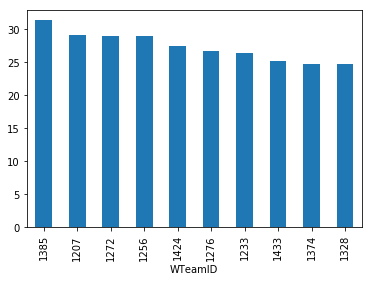

In [102]:
temp.groupby('WTeamID')['WElo'].mean().nlargest(10).plot(kind='bar')